In [1]:
import assessmentModule as amod
from itertools import cycle
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.fftpack as sf
import scipy.signal as ss
%matplotlib inline

In [4]:
# Assessment or activity ID.
assessment_id = '5699429dadac18f6038b4568'
#assessment_id = '569d7512adac18b82c8b456b'
#assessment_id = '569d6c78adac18792c8b4568'

# Specify directory with Matlab-format sweep data.
home_dir = os.path.expanduser('~')
data_dir = os.path.join(home_dir, 'data/heart_rate')

# Specify Matlab sweep file name.
mat_file = assessment_id + '_sweep.mat'

# Read in sweep .mat file from specified directory.
try:
    data = amod.getMatlabData(os.path.join(data_dir, mat_file))
except:
    print('{0} not found.'.format(mat_file))

# Specify beginning and end slice indices.
start = 100
end = 4400
#start = 8000
#end = 11000
#start = 0
#end = 1160

# Pull out heart rate, take slice for resting phase.
# Here, portion of 15-minute interval.
heart_rate = data['HR'][start:end]

# For each LED, pull out counts for 15 mm.
# LED wavelengths are 665, 810, 850, 950.
count_15 = data['count15'][start:end]
count_27 = data['count27'][start:end]
counts = {}
wavelengths = [665, 810, 850, 950]
for i in enumerate(wavelengths):
    counts[str(i[1])] = count_15[:, i[0]]

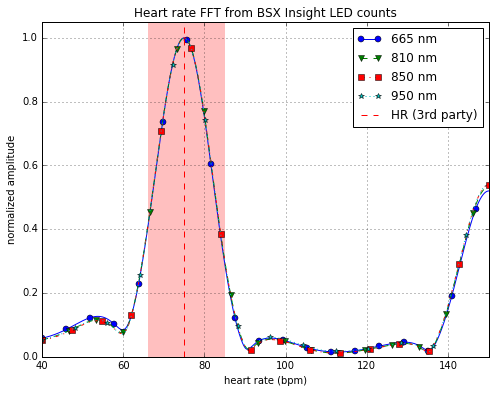

In [5]:
T = 0.2  # Sample interval in seconds.
markers = cycle(['o', 'v', 's', '*', '>', '<', '8', 'p'])
lines = cycle(['-', '--', '-.', ':'])
marker_freq = cycle([85, 95, 105, 115])
for i in wavelengths:
    key = str(i)
    N = len(counts[key])  # Number of samples.
    w = ss.gaussian(N, std=7, sym=False)  # Window of length N.
    yf = sf.fft(counts[key] * w)  # Convolve signal with window and FFT.
    xf = np.linspace(0.0, 1.0 / (2.0 * T), N / 2)  # x-axis spacing.
    min_idx = np.where(xf > 40./60.)  # Get indices where HR > 40 bpm only.
    new_yf = 2/N * np.abs(yf[0:int(N/2)][min_idx])
    new_xf = xf[min_idx]
    new_yf_max = new_yf.max()
    plt.plot(new_xf * 60, new_yf / new_yf_max,
             label=key + ' nm',
             linestyle=next(lines),
             marker=next(markers),
             markevery=next(marker_freq))

plt.title('Heart rate FFT from BSX Insight LED counts')
plt.xlabel('heart rate (bpm)')
plt.ylabel('normalized amplitude')
plt.axvspan(heart_rate.min(), heart_rate.max(), color='r', alpha=0.25, linewidth=0)
plt.axvline(x=heart_rate.mean(), color='r',
            linestyle='dashed', label='HR (3rd party)')
plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['legend.loc'] = 'best'
plt.legend()
plt.grid()
plt.xlim(xmin=new_xf[0] * 60,
         xmax=new_xf[-1] * 60)
plt.ylim(ymin=0.0, ymax=1.05)
plt.show()

In [188]:
start = 100
end = 4400
start = 8000
end = 11000
derived_quantities = {}
derived_quantities['cHHb_SmO2'] = data['cHHb_SmO2'][start:end]
derived_quantities['cHbO2_SmO2'] = data['cHbO2_SmO2'][start:end]
derived_quantities['cHHb_cHbO2_SmO2'] = data['cHHb_SmO2'] + data['cHbO2_SmO2']
heart_rate = data['HR'][start:end]

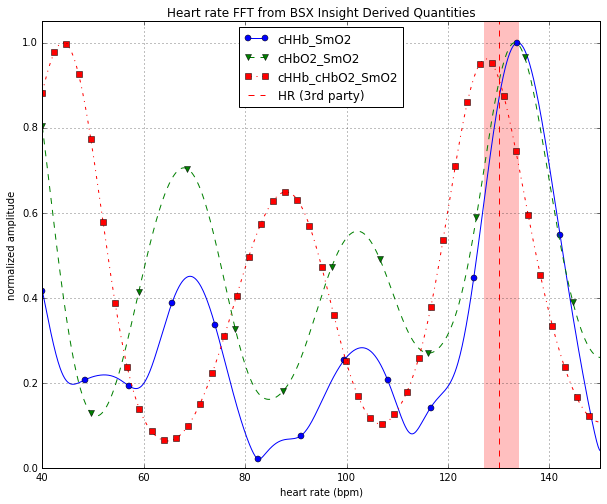

In [189]:
T = 0.2  # Sample interval in seconds.
markers = cycle(['o', 'v', 's', '*', '>', '<', '8', 'p'])
lines = cycle(['-', '--', '-.', ':'])
marker_freq = cycle([85, 95, 105, 115])
for key in derived_quantities.keys():
    x = derived_quantities[key]
    x = x[~np.isnan(x)]
    N = len(x)  # Number of samples.
    w = ss.gaussian(N, std=7, sym=False)  # Window of length N.
    yf = sf.fft(x * w)  # Convolve signal with window and FFT.
    xf = np.linspace(0.0, 1.0 / (2.0 * T), N / 2)  # x-axis spacing.
    min_idx = np.where(xf > 40./60.)  # Get indices where HR > 40 bpm only.
    new_yf = 2/N * np.abs(yf[0:int(N/2)][min_idx])
    new_xf = xf[min_idx]
    new_yf_max = new_yf.max()
    plt.plot(new_xf * 60, new_yf / new_yf_max,
             label=key,
             linestyle=next(lines),
             marker=next(markers),
             markevery=next(marker_freq))

plt.title('Heart rate FFT from BSX Insight Derived Quantities')
plt.xlabel('heart rate (bpm)')
plt.ylabel('normalized amplitude')
plt.axvspan(heart_rate.min(), heart_rate.max(), color='r', alpha=0.25, linewidth=0)
plt.axvline(x=heart_rate.mean(), color='r',
            linestyle='dashed', label='HR (3rd party)')
plt.rcParams['figure.figsize'] = 10, 8
plt.rcParams['legend.loc'] = 'best'
plt.legend()
plt.grid()
plt.xlim(xmin=new_xf[0] * 60,
         xmax=new_xf[-1] * 60)
plt.ylim(ymin=0.0, ymax=1.05)
plt.show()

In [ ]:
# Create signal for a 72 bpm heart rate.
fs = 5  # Sampling rate in Hz.
duration = 6  # Total period in seconds.
f = 72.0  # Sine wave frequency in Hz.
samples = (np.sin(2*np.pi*np.arange(fs*duration)*f/fs))

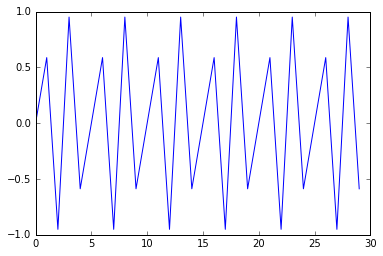

In [12]:
plt.plot(samples)
plt.show()

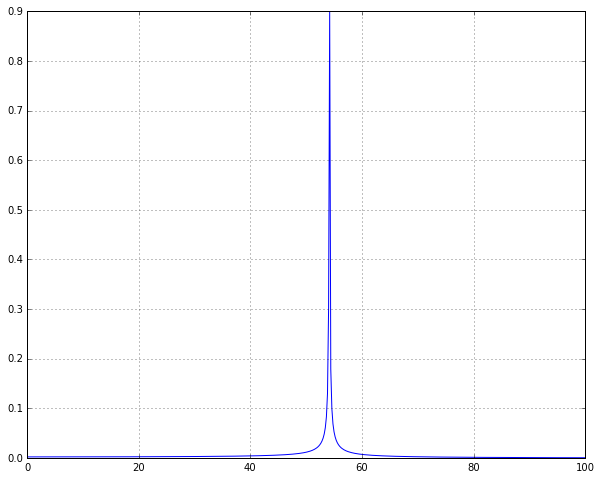

In [31]:
# Loop over slices of sample data to build FFT.
N = 1024  # Number of samples.
T = 1.0 / 200.0  # Sample spacing.
x = np.linspace(0.0, N*T, N)  # x-axis for sample spacing.
y = np.sin(54.0 * 2.0 * np.pi * x)  # y-axis for waveform.

# Slice the y-axis data by window_size.
yf = sf.fft(y)
xf = np.linspace(0.0, 1.0/(2.0 * T), N / 2)

plt.plot(xf, 2.0/N * np.abs(yf[0:int(N/2)]))
plt.rcParams['figure.figsize'] = 10, 8
plt.grid()
plt.show()

In [28]:
freqs = sf.fftfreq(N, T)
abs(freqs[yf.argmax()])

54.0